In [65]:
%run Proyecto_idDrRecursos.ipynb
#Aumentar visualización de datos ya que notebok limita el numero de columnas a observar 
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [66]:
data_wine_raw = pd.read_csv("./PCA/wine_data.csv")
data_wine_raw

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [67]:
#Extracción de caracteristicas
data_wine_nc = data_wine_raw.iloc[:,1:]
#Extracción de labels
labels = data_wine_raw.iloc[:,0]



In [75]:
def cal_PCA_percent(percent_query):
    #Datos

    #-Query
    nume_sample_query = int((len(data_wine_nc)) * percent_query/100)
    query_index_samples = random.sample(list(range(0,178)), nume_sample_query)
    query_index_samples.sort()
    query_samples = data_wine_nc.iloc[query_index_samples]

    #-Training samples
    training_samples = data_wine_nc.drop(query_index_samples)

    #-Labels 
    query_samples_labels = labels[query_index_samples]
    training_samples_labels = labels.drop(query_index_samples) 

    #Normalización 

    #Creamos una matriz (filas_training, 13)
    promedios_training = np.array(training_samples.mean())
    promedios_training_t = np.tile(promedios_training, (training_samples.shape[0], 1))
    promedios_training_q = np.tile(promedios_training, (query_samples.shape[0],1))

    #Creamos una matriz diagonal con los valores de las desviaciones std de cada fila 
    std_training = np.array(training_samples.std()) ** -1
    dig_std_training = np.eye(len(std_training))
    np.fill_diagonal(dig_std_training, std_training)

    #Normalización para training ---------------------------------------------
    #Aplicando primero -> x - µ = ß
    normal_training = training_samples - promedios_training_t
    #Luego ł = ß / σ
    #Para ello ł se multiplicara por una matriz diagonal en donde la diagonal contiene sus desviaciones std
    normal_training = (normal_training @ dig_std_training).T

    #Normalización para query ------------------------------------------------
    #Aplicando primero -> x - µ = ß
    normal_query = query_samples - promedios_training_q
    #Luego ł = ß / σ
    #Para ello ł se multiplicara por una matriz diagonal en donde la diagonal contiene sus desviaciones std
    normal_query = (normal_query @ dig_std_training)

    #PCA--------------------------------------------------------------------
    #Dimension wine_normal_query -> (35, 13)
    matrix_cov = np.cov(normal_training)
    eigen_val, eigen_vec = np.linalg.eig(matrix_cov)
    ind = np.argsort( eigen_val)[::-1]
    eigen_vec_ord = eigen_vec[:, ind]
    eigenvectores_visualizar = [0, 1, 2]
    matriz_de_transformacion = eigen_vec_ord[:,eigenvectores_visualizar]
    #La matriz_de_transformacion tiene las dimensiones de -> (13,3)
    data_reducido = normal_query @ matriz_de_transformacion

    #Graficas-------------------------------------------------------------
    wines = query_samples_labels.value_counts()
    wines = wines.sort_index()
    prim = wines.iloc[0]
    seg = prim + wines.iloc[1]
    feature_ejex = 0
    feature_ejey = 1
    feature_ejez = 2

    #3D-----------------------------------------------------------
    x_1 = (data_reducido.iloc[:prim,feature_ejex]).to_list()
    y_1 = (data_reducido.iloc[:prim,feature_ejey]).to_list()
    z_1 = (data_reducido.iloc[:prim,feature_ejez]).to_list()

    x_2 = (data_reducido.iloc[prim:seg,feature_ejex]).to_list()
    y_2 = (data_reducido.iloc[prim:seg,feature_ejey]).to_list()
    z_2 = (data_reducido.iloc[prim:seg,feature_ejez]).to_list()

    x_3 = (data_reducido.iloc[seg:,feature_ejex]).to_list()
    y_3 = (data_reducido.iloc[seg:,feature_ejey]).to_list()
    z_3 = (data_reducido.iloc[seg:,feature_ejez]).to_list()
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')

    # Graficar puntos para cada grupo con diferentes colores y marcadores
    ax.scatter(x_1, y_1, z_1, c='r', marker='o', label='Grupo 1')
    ax.scatter(x_2, y_2, z_2, c='g', marker='^', label='Grupo 2')
    ax.scatter(x_3, y_3, z_3, c='b', marker='s', label='Grupo 3')

    #Titulo
    ax.set_title(f"Porcentaje query {percent_query}")
    # Etiquetas de los ejes
    ax.set_title(f"Porcentaje {percent_query}")
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    # Añadir leyenda
    ax.legend()
    # Mostrar gráfico
    plt.show()

    # Crear figura
    plt.figure()

    # Graficar puntos para cada grupo con diferentes colores y marcadores
    plt.scatter(x_1, y_1, c='r', marker='o', label='Grupo 1')
    plt.scatter(x_2, y_2, c='g', marker='^', label='Grupo 2')
    plt.scatter(x_3, y_3, c='b', marker='s', label='Grupo 3')

    # Etiquetas de los ejes
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')

    # Añadir leyenda
    plt.legend()

    # Mostrar gráfico
    plt.show()

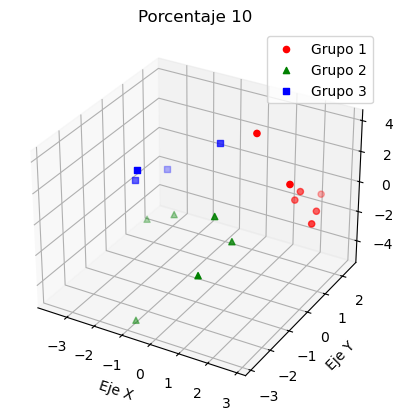

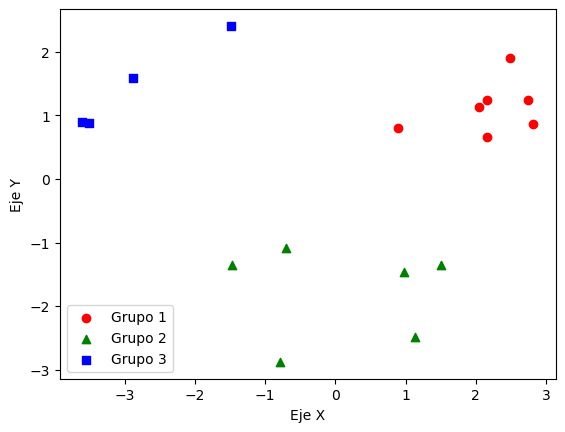

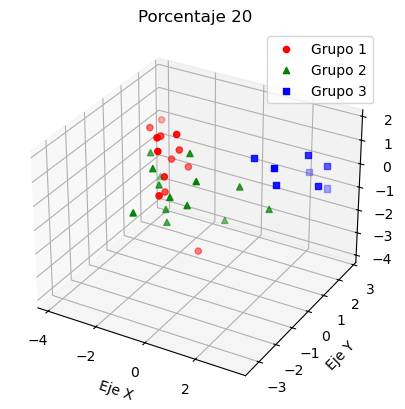

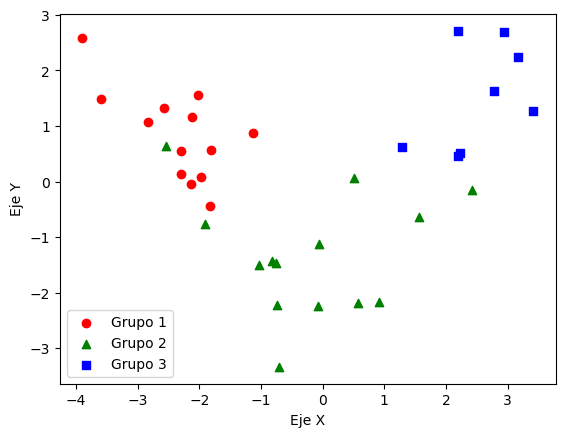

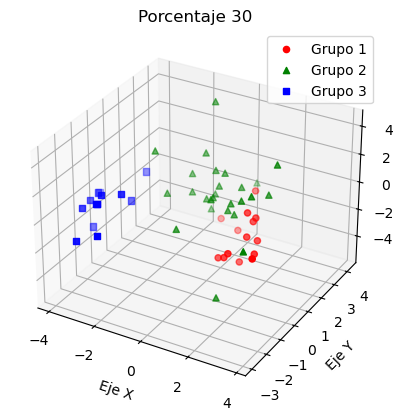

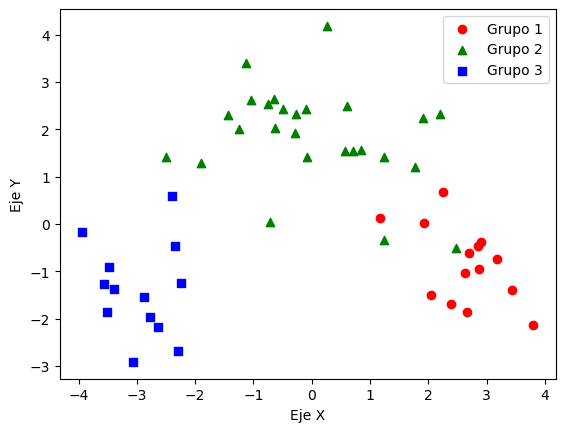

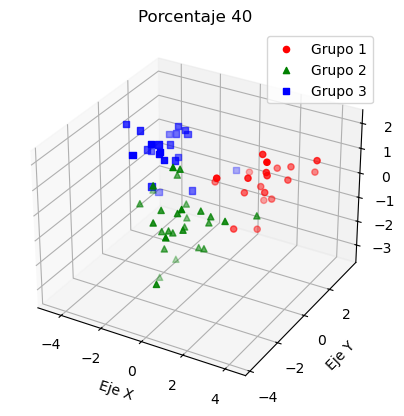

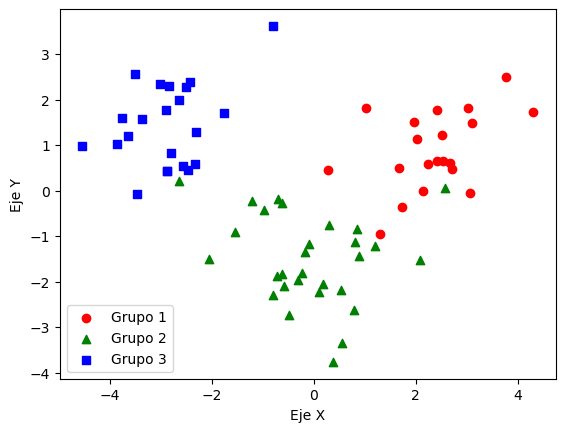

In [78]:
porcentajes = [10, 20, 30, 40]
for porcentaje in porcentajes:
    cal_PCA_percent(porcentaje)
